In [206]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  4 22:20:13 2016
@author: dhkim
"""
import urllib2
from bs4 import BeautifulSoup
import re 
from collections import defaultdict 
from pandas import Series, DataFrame 
import numpy as np 
from bs4 import BeautifulSoup
import re 
import sys
sys.setrecursionlimit(20000)
import unidecode
import urllib2
import unidecode
import unicodedata
import os
import requests
import lxml
import html5lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division, print_function  # Python 2 and 3 Compatibility
import seaborn as sns
%matplotlib inline 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

In [ ]:
def solver(list_of_variables, mpaaRating): 
    list_to_append = []
    for category in list_of_variables: 
        try: 
            if category == 'Rotten Tomatoes':  
                rating_index = mpaaRating.index(category)+3
                rating = mpaaRating[rating_index:rating_index+2]
                
                list_to_append.extend([rating])
                
            else:
                category = (mpaaRating[mpaaRating.index(category)+1])
                list_to_append.append(category)
                
        except (ValueError, AttributeError):
            
            list_to_append.append(None)
        
    
            
    return list_to_append

response = urllib2.urlopen('http://www.the-numbers.com/movie/budgets/all')
main_doc = response.read()

In [ ]:
def txt_link_downloader(html_link):
    
    soup = BeautifulSoup(html_link, 'html5lib')
    list_df = []    
    batch = soup.find_all('td')
    counter = 0
    length = len(batch)
    for index,i in enumerate(range(0,length,6)):
        list_df.append(map(lambda x: x.get_text(), batch[i:i+6]))
        try:
            url_end = BeautifulSoup(batch[i+2].encode('utf-8'),'html5lib').find('a').get('href') 
            url = 'http://www.the-numbers.com' + url_end
            list_df[index].append(url)
            
            response = urllib2.urlopen(url)
            main_doc = response.read()
            soup = BeautifulSoup(main_doc,'html5lib')
        
            mpaaRating = []
            for tr in soup.findAll('tr'): 
                for td in tr.findAll('td'): 
                    mpaaRating.append(td.get_text())
            mpaaRating = [unidecode.unidecode(x).strip() for x in mpaaRating]   
            
            list_of_variables = ['Genre:','Running Time:','MPAA Rating:','Production Companies:','Domestic Releases:','Domestic DVD Sales','Domestic Blu-ray Sales','Total Domestic Video Sales','Rotten Tomatoes']
            
            second_page = solver(list_of_variables,mpaaRating)
            
            list_df[index].extend(second_page)
            
            response = urllib2.urlopen(url)
            main_doc = response.read()
            soup = BeautifulSoup(main_doc,'html5lib')
            soup = soup.find(text = re.compile('Weekend Box Office Performance')).parent.parent.find('div', attrs = {"id": "box_office_chart"})
            try:
                soup = soup.get_text()
                soup = unicodedata.normalize('NFKD', soup).encode('utf-8').split()[4:35]
                soup.insert(3,'None')
                list_df[index].extend(soup)
            except:
                print('doesnt work 1')
        
            counter += 1
            #print('passing first complete iteration', counter)
            print counter
            if counter == 5231:
                return DataFrame(list_df)
        except:
            print ('doesnt work 2')

list_df = txt_link_downloader(main_doc)

list_df.to_csv('total.csv', encoding= 'utf-8' )

In [468]:
import glob, os
import csv

def read_dataframe():
    csv_list = []
    for csv_file_name in glob.glob(('total[0-9].csv')):
        csv_list.append(pd.read_csv(csv_file_name))
    return pd.concat(csv_list)

df = read_dataframe()
df.to_csv('practicefinish.csv')

In [469]:
df = pd.read_csv('practicefinish.csv')

In [470]:
df.head()

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,38,39,40,41,42,43,44,45,46,47
0,0,0,1,12/18/2009,Avatar,"$425,000,000","$760,507,625","$2,783,918,982",http://www.the-numbers.com/movie/Avatar#tab=su...,Action,...,"$352,114,898",17,2010/01/08,1,"$50,306,217",-27%,"3,422","$14,701","$430,846,514",24
1,1,1,2,12/18/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,058,662,225",http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,...,"$742,208,942",17,2016/01/08,1,"$42,353,785",-53%,"4,134","$10,245","$812,734,828",24
2,2,2,3,5/24/2007,Pirates of the Caribbean: At World's End,"$300,000,000","$309,420,425","$963,420,425",http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,...,"$253,441,723",17,2007/06/15,4,"$12,411,786",-41%,"3,329","$3,728","$274,145,510",24
3,3,3,4,11/6/2015,Spectre,"$300,000,000","$200,074,175","$879,620,923",http://www.the-numbers.com/movie/Spectre#tab=s...,Action,...,"$154,146,608",17,2015/11/27,4,"$12,887,772",-14%,"2,940","$4,384","$176,125,179",24
4,4,4,5,7/20/2012,The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",http://www.the-numbers.com/movie/Dark-Knight-R...,Action,...,"$353,935,094",17,2012/08/10,3,"$18,979,397",-47%,"3,690","$5,143","$389,588,216",24


In [471]:
from dateutil.parser import parse
def scrubber(file):
    df = pd.read_csv(file)
    df = df[~df[df.columns[4]].duplicated()]
    df.columns = range(df.shape[1])
    columns_to_delete = [0,1,2,18,25,26,33,34,41,42,49]
    for column in columns_to_delete:
        del df[column]
    
    columns=['Release Date','Title','Production Budget','Domestic Gross','Worldwide Gross','Url','Genre','Runtime','MPAA','Production Companies','Release','Domestic DVD Sales','Domestic Blu-ray Sales','Total Domestic Video Sales','Critic Rating','Wknd 1 Rank','Wknd 1 Gross','Wknd 1 %Change','Wknd 1 # Theaters','Wknd 1 GPT','Week 1 TG', 'Wknd 2 Rank','Wknd 2 Gross','Wknd 2 %Change','Wknd 2 # Theaters','Wknd 2 GPT','Week 2 TG','Wknd 3 Rank','Wknd 3 Gross','Wknd 3 %Change','Wknd 3 # Theaters','Wknd 3 GPT','Week 3 TG','Wknd 4 Rank','Wknd 4 Gross','Wknd 4 %Change','Wknd 4 # Theaters','Wknd 4 GPT','Week 4 TG']
    df.columns = columns
    
    df[df.isnull()]
    df.replace('nan',0,inplace=True)
    
    columns_to_scrub = ['Production Budget','Domestic Gross','Worldwide Gross','Domestic DVD Sales','Domestic Blu-ray Sales','Total Domestic Video Sales','Wknd 1 Rank','Wknd 1 Gross','Wknd 1 # Theaters','Wknd 1 GPT','Week 1 TG', 'Wknd 2 Rank','Wknd 2 Gross','Wknd 2 %Change','Wknd 2 # Theaters','Wknd 2 GPT','Week 2 TG','Wknd 3 Rank','Wknd 3 Gross','Wknd 3 %Change','Wknd 3 # Theaters','Wknd 3 GPT','Week 3 TG','Wknd 4 Rank','Wknd 4 Gross','Wknd 4 %Change','Wknd 4 # Theaters','Wknd 4 GPT','Week 4 TG']
    
    for column in columns_to_scrub:
        df[column] = df[column].map(lambda x: (re.sub('[$|,|%]','',str(x))))
            
    df['Runtime'] = df['Runtime'].astype(str).map(lambda x: x.split()[0])
    
    df['MPAA'] = df['MPAA'].astype(str).map(lambda x: x.split()[0])  
    
    df['Critic Rating'] = df['Critic Rating'].astype(str).map(lambda x: x.strip())        
    df['Release Date'] = df['Release Date'].apply(lambda x: parse(x))
    
    return df 

df = scrubber('practicefinish.csv')
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 %Change,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG
0,2009-12-18,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,-9,3461,19789,352114898,1,50306217,-27,3422,14701,430846514
1,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2058662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,136,PG-13,"Lucasfilm, Bad Robot",...,-40,4134,21829,742208942,1,42353785,-53,4134,10245,812734828
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",...,-52,4002,5283,253441723,4,12411786,-41,3329,3728,274145510
3,2015-11-06,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148,PG-13,Eon Productions,...,-55,3659,4111,154146608,4,12887772,-14,2940,4384,176125179
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164,PG-13,"Warner Bros., Legendary Pictures, Syncopy",...,-42,4242,8425,353935094,3,18979397,-47,3690,5143,389588216


In [478]:
#%%
import re
def split_critic(df):
    
    list_of_rating = df['Critic Rating'].tolist()

    total_rating = [] 
    
    for rating_string in list_of_rating:
        
        if rating_string == 'nan' or len(rating_string)==0 or re.findall('\d+%',rating_string)==[]: 
            total_rating.append([0,0])
        elif len(re.findall('\d+%',rating_string))==1:
            total_rating.append([re.findall('\d+%',rating_string)[0],re.findall('\d+%',rating_string)[0]])
        else:
            list_pair = re.findall('\d+%',rating_string)
            total_rating.append(list_pair)

    critic_rate, audience_rate = zip(*total_rating)
    
    df['Critic Rate'] = map(lambda x: re.sub('[$|,|%]','',str(x)),critic_rate)
    df['Audience Rate'] = map(lambda x: re.sub('[$|,|%]','',str(x)),audience_rate)
    
    return df 

df = split_critic(df)
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,19789,352114898,1,50306217,-27,3422,14701,430846514,83,82
1,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2058662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,136,PG-13,"Lucasfilm, Bad Robot",...,21829,742208942,1,42353785,-53,4134,10245,812734828,0,0
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",...,5283,253441723,4,12411786,-41,3329,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148,PG-13,Eon Productions,...,4111,154146608,4,12887772,-14,2940,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164,PG-13,"Warner Bros., Legendary Pictures, Syncopy",...,8425,353935094,3,18979397,-47,3690,5143,389588216,87,90


In [480]:
df.to_csv('finallycountdown',index=False)

In [4]:
df = pd.read_csv('finallycountdown')

In [5]:
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,19789.0,352114898,1.0,50306217.0,-27,3422.0,14701,430846514,83,82
1,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2058662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,136.0,PG-13,"Lucasfilm, Bad Robot",...,21829.0,742208942,1.0,42353785.0,-53,4134.0,10245,812734828,0,0
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",...,5283.0,253441723,4.0,12411786.0,-41,3329.0,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148.0,PG-13,Eon Productions,...,4111.0,154146608,4.0,12887772.0,-14,2940.0,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",...,8425.0,353935094,3.0,18979397.0,-47,3690.0,5143,389588216,87,90


In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y/%m/%d')

In [7]:
df[df['Title'] == 'Godzilla']

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
107,2014-05-16,Godzilla,160000000,200676069,529076069,http://www.the-numbers.com/movie/Godzilla-(201...,Action,123.0,PG-13,Legendary Pictures,...,3430.0,174439686,6.0,6121179.0,-49,3110.0,1968,185214185,88,88


In [8]:
df = df[(df['Critic Rate']>0) & (df['Audience Rate']>0)]
df = df[(df['Domestic Gross']>0) & (df['Worldwide Gross']>0) & (df['Production Budget']>0)]

In [9]:
df.shape

(4297, 41)

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('<M8[ns]'): ['Release Date'],
 dtype('int64'): ['Production Budget',
  'Domestic Gross',
  'Worldwide Gross',
  'Critic Rate',
  'Audience Rate'],
 dtype('float64'): ['Runtime',
  'Domestic DVD Sales',
  'Domestic Blu-ray Sales',
  'Total Domestic Video Sales',
  'Wknd 1 Gross',
  'Wknd 1 # Theaters',
  'Wknd 1 GPT',
  'Week 1 TG',
  'Wknd 2 Gross',
  'Wknd 2 # Theaters',
  'Wknd 2 GPT',
  'Wknd 3 Gross',
  'Wknd 3 # Theaters',
  'Wknd 3 GPT',
  'Wknd 4 Rank',
  'Wknd 4 Gross',
  'Wknd 4 # Theaters'],
 dtype('O'): ['Title',
  'Url',
  'Genre',
  'MPAA',
  'Production Companies',
  'Release',
  'Critic Rating',
  'Wknd 1 Rank',
  'Wknd 1 %Change',
  'Wknd 2 Rank',
  'Wknd 2 %Change',
  'Week 2 TG',
  'Wknd 3 Rank',
  'Wknd 3 %Change',
  'Week 3 TG',
  'Wknd 4 %Change',
  'Wknd 4 GPT',
  'Week 4 TG']}

In [11]:
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,19789.0,352114898,1.0,50306217.0,-27,3422.0,14701,430846514,83,82
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",...,5283.0,253441723,4.0,12411786.0,-41,3329.0,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148.0,PG-13,Eon Productions,...,4111.0,154146608,4.0,12887772.0,-14,2940.0,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",...,8425.0,353935094,3.0,18979397.0,-47,3690.0,5143,389588216,87,90
5,2013-07-02,The Lone Ranger,275000000,89302115,260002115,http://www.the-numbers.com/movie/Lone-Ranger-T...,Western,149.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer, Blind...",...,1927.0,81291290,14.0,1684417.0,-62,1267.0,1329,85321430,31,51


In [12]:
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].mean())

In [13]:
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,19789.0,352114898,1.0,50306217.0,-27,3422.0,14701,430846514,83,82
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",...,5283.0,253441723,4.0,12411786.0,-41,3329.0,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148.0,PG-13,Eon Productions,...,4111.0,154146608,4.0,12887772.0,-14,2940.0,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",...,8425.0,353935094,3.0,18979397.0,-47,3690.0,5143,389588216,87,90
5,2013-07-02,The Lone Ranger,275000000,89302115,260002115,http://www.the-numbers.com/movie/Lone-Ranger-T...,Western,149.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer, Blind...",...,1927.0,81291290,14.0,1684417.0,-62,1267.0,1329,85321430,31,51


In [14]:
del df['Critic Rating']
del df['Url']
del df['Release']

In [15]:
df['MPAA'] = df['MPAA'].astype(str)

In [16]:
translator = {'M/PG':'PG-13','R(Rated':'R','GG(Rating':'G','Open':'G','G(Rating':'G','Not':'PG-13'}
df['MPAA'] = df['MPAA'].replace(translator)

In [17]:
df['MPAA'].value_counts()

R        1811
PG-13    1503
PG        581
nan       292
G         104
NC-17       6
Name: MPAA, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 0 to 5159
Data columns (total 38 columns):
Release Date                  4297 non-null datetime64[ns]
Title                         4297 non-null object
Production Budget             4297 non-null int64
Domestic Gross                4297 non-null int64
Worldwide Gross               4297 non-null int64
Genre                         4144 non-null object
Runtime                       4297 non-null float64
MPAA                          4297 non-null object
Production Companies          2166 non-null object
Domestic DVD Sales            1533 non-null float64
Domestic Blu-ray Sales        1068 non-null float64
Total Domestic Video Sales    1546 non-null float64
Wknd 1 Rank                   4087 non-null object
Wknd 1 Gross                  4087 non-null float64
Wknd 1 %Change                4087 non-null object
Wknd 1 # Theaters             4087 non-null float64
Wknd 1 GPT                    4087 non-null float64
Week 1 TG     

In [19]:
df.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Genre,Runtime,MPAA,Production Companies,Domestic DVD Sales,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",232272127.0,...,19789.0,352114898,1.0,50306217.0,-27,3422.0,14701,430846514,83,82
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",312295851.0,...,5283.0,253441723,4.0,12411786.0,-41,3329.0,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,Action,148.0,PG-13,Eon Productions,11659112.0,...,4111.0,154146608,4.0,12887772.0,-14,2940.0,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",71708702.0,...,8425.0,353935094,3.0,18979397.0,-47,3690.0,5143,389588216,87,90
5,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Western,149.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer, Blind...",25540333.0,...,1927.0,81291290,14.0,1684417.0,-62,1267.0,1329,85321430,31,51


In [20]:
df1 = df.drop(['Domestic DVD Sales','Domestic Blu-ray Sales','Total Domestic Video Sales','Wknd 4 Rank','Wknd 4 Gross','Wknd 4 # Theaters'], axis=1)

In [21]:
df1.describe().ix['count']

Production Budget    4297.0
Domestic Gross       4297.0
Worldwide Gross      4297.0
Runtime              4297.0
Wknd 1 Gross         4087.0
Wknd 1 # Theaters    4087.0
Wknd 1 GPT           4087.0
Week 1 TG            4087.0
Wknd 2 Gross         3982.0
Wknd 2 # Theaters    3982.0
Wknd 2 GPT           3982.0
Wknd 3 Gross         3878.0
Wknd 3 # Theaters    3878.0
Wknd 3 GPT           3878.0
Critic Rate          4297.0
Audience Rate        4297.0
Name: count, dtype: float64

In [36]:
df2 = df1[df1['Wknd 3 Gross'].notnull() & df1['Wknd 3 # Theaters'].notnull() & df1['Wknd 3 GPT'].notnull()]

In [37]:
df2.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Runtime,Wknd 1 Gross,Wknd 1 # Theaters,Wknd 1 GPT,Week 1 TG,Wknd 2 Gross,Wknd 2 # Theaters,Wknd 2 GPT,Wknd 3 Gross,Wknd 3 # Theaters,Wknd 3 GPT,Critic Rate,Audience Rate
count,3.878000e+03,3.878000e+03,3.878000e+03,3878.000000,3.878000e+03,3878.000000,3878.000000,3.878000e+03,3.878000e+03,3.878000e+03,3.878000e+03,3.878000e+03,3.878000e+03,3.878000e+03,3878.000000,3878.000000
mean,3.739876e+07,5.030342e+07,1.079353e+08,110.619715,1.315128e+07,1729.155493,11038.067045,1.410203e+07,7.366327e+06,5.176752e+04,8.812412e+04,4.544616e+06,5.463066e+04,1.519765e+05,54.399948,61.787777
std,4.243241e+07,6.832868e+07,1.785744e+08,14.230328,1.981866e+07,1335.888916,26617.635356,2.182714e+07,9.907463e+06,3.101108e+06,2.757859e+06,6.019960e+06,3.129028e+06,3.101008e+06,27.272820,19.086031
min,6.000000e+03,1.242000e+03,1.242000e+03,52.000000,1.620000e+02,0.000000,162.000000,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,-8.500000e+01,1.000000e+00,3.000000e+00,1.000000,9.000000
25%,1.000000e+07,7.010549e+06,1.223731e+07,106.000000,3.476290e+05,28.000000,3645.000000,4.050120e+05,5.655718e+05,1.780000e+02,1.954250e+03,3.633825e+05,2.725000e+02,1.260500e+03,31.000000,47.000000
50%,2.400000e+07,2.729358e+07,4.369336e+07,110.548677,7.260568e+06,2022.000000,6198.500000,7.485021e+06,4.320566e+06,2.132000e+03,3.468500e+03,2.550756e+06,1.714000e+03,2.246000e+03,56.000000,63.000000
75%,5.000000e+07,6.443968e+07,1.253168e+08,110.548677,1.683198e+07,2848.750000,11006.250000,1.774270e+07,9.826318e+06,2.908000e+03,6.156250e+03,6.285767e+06,2.659750e+03,4.019750e+03,79.000000,78.000000
max,4.250000e+08,7.605076e+08,2.783919e+09,220.000000,2.088063e+08,4468.000000,945000.000000,2.088063e+08,1.065884e+08,1.931189e+08,1.658030e+08,6.849069e+07,1.947872e+08,1.732300e+08,100.000000,100.000000


In [24]:
df2.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Genre,Runtime,MPAA,Production Companies,Wknd 1 Rank,...,Wknd 3 Gross,Wknd 3 %Change,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 %Change,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",1,...,68490688.0,-9,3461.0,19789.0,352114898,-27,14701,430846514,83,82
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",1,...,21143905.0,-52,4002.0,5283.0,253441723,-41,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,Action,148.0,PG-13,Eon Productions,1,...,15043729.0,-55,3659.0,4111.0,154146608,-14,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",1,...,35737330.0,-42,4242.0,8425.0,353935094,-47,5143,389588216,87,90
5,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Western,149.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer, Blind...",2,...,4380047.0,-62,2273.0,1927.0,81291290,-62,1329,85321430,31,51


In [61]:
df2 = df2[df2['Genre'].notnull()]

In [26]:
df2.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Genre,Runtime,MPAA,Production Companies,Wknd 1 Rank,...,Wknd 3 Gross,Wknd 3 %Change,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 %Change,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,2009-12-18,Avatar,425000000,760507625,2783918982,Action,162.0,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...",1,...,68490688.0,-9,3461.0,19789.0,352114898,-27,14701,430846514,83,82
2,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,Adventure,167.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer",1,...,21143905.0,-52,4002.0,5283.0,253441723,-41,3728,274145510,45,72
3,2015-11-06,Spectre,300000000,200074175,879620923,Action,148.0,PG-13,Eon Productions,1,...,15043729.0,-55,3659.0,4111.0,154146608,-14,4384,176125179,65,62
4,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Action,164.0,PG-13,"Warner Bros., Legendary Pictures, Syncopy",1,...,35737330.0,-42,4242.0,8425.0,353935094,-47,5143,389588216,87,90
5,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Western,149.0,PG-13,"Walt Disney Pictures, Jerry Bruckheimer, Blind...",2,...,4380047.0,-62,2273.0,1927.0,81291290,-62,1329,85321430,31,51


# Setting the tone 

In [27]:
from pylab import *
val = [14.5,11.5,6.1,4.1,4.6]    # the bar lengths
pos = arange(5)+.5    # the bar centers on the y axis

figure(1)
barh(pos,val, align='center')
yticks(pos,('China','Argentina','Brazil','U.S.','Global'))
xlabel('% Growth')
title('Expanding appetite for E&M')
#grid(True)

#figure(2)
#barh(pos,val, xerr=rand(5), ecolor='r', align='center')
#yticks(pos, ('Tom', 'Dick', 'Harry', 'Slim', 'Jim'))
#xlabel('Performance')

show()

In [28]:
from pylab import *
val = [14.5,11.5,6.1,4.1,4.6]    # the bar lengths
pos = arange(5)+.5    # the bar centers on the y axis

figure(1)
barh(pos,val, align='center')
yticks(pos,('China','Argentina','Brazil','U.S.','Global'))
xlabel('% Growth')
title('Expanding appetite for E&M')
#grid(True)

show()

In [29]:
from pylab import *
val = [11.5,6.78,1.9,1.8,1.6]    # the bar lengths
pos = arange(5)+.5    # the bar centers on the y axis

figure(1)
barh(pos,val, align='center')
yticks(pos,('U.S./Canada','China','UK','Japan','India'))
xlabel('$ Bn')
title('2015 Box Office Size by Leaders')

show()

In [38]:
df2.columns

Index([u'Release Date', u'Title', u'Production Budget', u'Domestic Gross',
       u'Worldwide Gross', u'Genre', u'Runtime', u'MPAA',
       u'Production Companies', u'Wknd 1 Rank', u'Wknd 1 Gross',
       u'Wknd 1 %Change', u'Wknd 1 # Theaters', u'Wknd 1 GPT', u'Week 1 TG',
       u'Wknd 2 Rank', u'Wknd 2 Gross', u'Wknd 2 %Change',
       u'Wknd 2 # Theaters', u'Wknd 2 GPT', u'Week 2 TG', u'Wknd 3 Rank',
       u'Wknd 3 Gross', u'Wknd 3 %Change', u'Wknd 3 # Theaters', u'Wknd 3 GPT',
       u'Week 3 TG', u'Wknd 4 %Change', u'Wknd 4 GPT', u'Week 4 TG',
       u'Critic Rate', u'Audience Rate'],
      dtype='object')

In [54]:
del df2['Production Companies']

In [55]:
df2.columns

Index([u'Release Date', u'Title', u'Production Budget', u'Domestic Gross',
       u'Worldwide Gross', u'Genre', u'Runtime', u'MPAA', u'Wknd 1 Rank',
       u'Wknd 1 Gross', u'Wknd 1 %Change', u'Wknd 1 # Theaters', u'Wknd 1 GPT',
       u'Week 1 TG', u'Wknd 2 Rank', u'Wknd 2 Gross', u'Wknd 2 %Change',
       u'Wknd 2 # Theaters', u'Wknd 2 GPT', u'Week 2 TG', u'Wknd 3 Rank',
       u'Wknd 3 Gross', u'Wknd 3 %Change', u'Wknd 3 # Theaters', u'Wknd 3 GPT',
       u'Week 3 TG', u'Wknd 4 %Change', u'Wknd 4 GPT', u'Week 4 TG',
       u'Critic Rate', u'Audience Rate'],
      dtype='object')

In [59]:
y_cols = df2.columns[4]
y_cols

'Worldwide Gross'

In [58]:
x_cols = list(df2.columns[5:])+list((df2.columns[2:4]))
x_cols

['Genre',
 'Runtime',
 'MPAA',
 'Wknd 1 Rank',
 'Wknd 1 Gross',
 'Wknd 1 %Change',
 'Wknd 1 # Theaters',
 'Wknd 1 GPT',
 'Week 1 TG',
 'Wknd 2 Rank',
 'Wknd 2 Gross',
 'Wknd 2 %Change',
 'Wknd 2 # Theaters',
 'Wknd 2 GPT',
 'Week 2 TG',
 'Wknd 3 Rank',
 'Wknd 3 Gross',
 'Wknd 3 %Change',
 'Wknd 3 # Theaters',
 'Wknd 3 GPT',
 'Week 3 TG',
 'Wknd 4 %Change',
 'Wknd 4 GPT',
 'Week 4 TG',
 'Critic Rate',
 'Audience Rate',
 'Production Budget',
 'Domestic Gross']

In [67]:
df2 = df2[df2['Genre'].notnull()]

In [72]:
df2 = df2[df2['Wknd 4 %Change'].notnull()]

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 5157
Data columns (total 31 columns):
Release Date         3727 non-null datetime64[ns]
Title                3727 non-null object
Production Budget    3727 non-null int64
Domestic Gross       3727 non-null int64
Worldwide Gross      3727 non-null int64
Genre                3727 non-null object
Runtime              3727 non-null float64
MPAA                 3727 non-null object
Wknd 1 Rank          3727 non-null object
Wknd 1 Gross         3727 non-null float64
Wknd 1 %Change       3727 non-null object
Wknd 1 # Theaters    3727 non-null float64
Wknd 1 GPT           3727 non-null float64
Week 1 TG            3727 non-null float64
Wknd 2 Rank          3727 non-null object
Wknd 2 Gross         3727 non-null float64
Wknd 2 %Change       3727 non-null object
Wknd 2 # Theaters    3727 non-null float64
Wknd 2 GPT           3727 non-null float64
Week 2 TG            3727 non-null object
Wknd 3 Rank          3727 non-null objec

In [87]:
df2['Domestic Gross'] = df2['Domestic Gross'].astype(float)

In [96]:
for i in df2['Wknd 1 Rank'].values: 
    if len(i)>3: 
        print i

26.0
12.0
11.0
23.0
10.0
12.0
43.0
11.0
11.0
29.0
13.0
10.0
11.0
10.0
29.0
10.0
10.0
33.0
22.0
17.0
41.0
20.0
51.0
38.0
59.0
45.0
38.0
10.0
76.0
40.0
12.0
22.0
34.0
10.0
28.0
35.0
17.0
14.0
13.0
46.0
10.0
24.0
11.0
13.0
55.0
41.0
62.0
48.0
22.0
20.0
17.0
17.0
26.0
20.0
36.0
15.0
32.0
10.0
16.0
23.0
23.0
24.0
19.0
10.0
25.0
28.0
33.0
19.0
22.0
19.0
32.0
19.0
37.0
39.0
18.0
22.0
12.0
20.0
13.0
35.0
12.0
13.0
56.0
13.0
34.0
34.0
19.0
13.0
12.0
16.0
20.0
17.0
13.0
29.0
31.0
58.0
46.0
17.0
41.0
52.0
43.0
38.0
36.0
40.0
53.0
61.0
35.0
39.0
11.0
29.0
11.0
10.0
23.0
21.0
22.0
14.0
22.0
19.0
11.0
25.0
24.0
12.0
37.0
31.0
22.0
37.0
31.0
41.0
56.0
43.0
30.0
14.0
12.0
32.0
58.0
88.0
17.0
59.0
28.0
64.0
24.0
20.0
12.0
12.0
16.0
38.0
57.0
17.0
33.0
52.0
11.0
20.0
16.0
42.0
15.0
15.0
29.0
10.0
10.0
11.0
11.0
10.0
13.0
42.0
32.0
45.0
30.0
52.0
20.0
27.0
59.0
20.0
11.0
15.0
16.0
38.0
35.0
12.0
15.0
26.0
28.0
29.0
11.0
43.0
21.0
19.0
42.0
10.0
27.0
18.0
20.0
11.0
23.0
10.0
10.0
18.0
10.0
25.0
28.0
14.0


In [101]:
wknd2 == 'n/c'

NameError: name 'wknd2' is not defined

In [108]:
df3 = df2[['Runtime',
 'Wknd 1 Rank',
 'Wknd 1 Gross',
 'Wknd 1 %Change',
 'Wknd 1 # Theaters',
 'Wknd 1 GPT',
 'Week 1 TG',
 'Wknd 2 Rank',
 'Wknd 2 Gross',
 'Wknd 2 %Change',
 'Wknd 2 # Theaters',
 'Wknd 2 GPT',
 'Week 2 TG',
 'Wknd 3 Rank',
 'Wknd 3 Gross',
 'Wknd 3 %Change',
 'Wknd 3 # Theaters',
 'Wknd 3 GPT',
 'Week 3 TG',
 'Wknd 4 %Change',
 'Wknd 4 GPT',
 'Week 4 TG',
 'Critic Rate',
 'Audience Rate',
 'Production Budget',
 'Domestic Gross']].apply(pd.to_numeric,errors='coerce')

del df3['Wknd 1 %Change']
df3.head()
#    df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
        

,Runtime,Wknd 1 Rank,Wknd 1 Gross,Wknd 1 # Theaters,Wknd 1 GPT,Week 1 TG,Wknd 2 Rank,Wknd 2 Gross,Wknd 2 %Change,Wknd 2 # Theaters,...,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 %Change,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate,Production Budget,Domestic Gross
0,162,1.0,77025481,3452,22313,77025481,1.0,75617133,-2.0,3456,...,3461,19789,352114898.0,-27.0,14701.0,430846514.0,83,82,425000000,760507625
2,167,1.0,114732820,4362,26303,127972864,1.0,44206660,-61.0,4362,...,4002,5283,253441723.0,-41.0,3728.0,274145510.0,45,72,300000000,309420425
3,148,1.0,70403148,3929,17919,70403148,1.0,33681104,-52.0,3929,...,3659,4111,154146608.0,-14.0,4384.0,176125179.0,65,62,300000000,200074175
4,164,1.0,160887295,4404,36532,160887295,1.0,62101451,-61.0,4404,...,4242,8425,353935094.0,-47.0,5143.0,389588216.0,87,90,275000000,448139099
5,149,2.0,29210849,3904,7482,48715010,5.0,11506100,-61.0,3904,...,2273,1927,81291290.0,-62.0,1329.0,85321430.0,31,51,275000000,89302115


In [123]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 5157
Data columns (total 25 columns):
Runtime              3727 non-null int64
Wknd 1 Rank          3726 non-null float64
Wknd 1 Gross         3727 non-null int64
Wknd 1 # Theaters    3727 non-null int64
Wknd 1 GPT           3727 non-null int64
Week 1 TG            3727 non-null int64
Wknd 2 Rank          3726 non-null float64
Wknd 2 Gross         3727 non-null int64
Wknd 2 %Change       3719 non-null float64
Wknd 2 # Theaters    3727 non-null int64
Wknd 2 GPT           3727 non-null int64
Week 2 TG            3725 non-null float64
Wknd 3 Rank          3726 non-null float64
Wknd 3 Gross         3727 non-null int64
Wknd 3 %Change       3722 non-null float64
Wknd 3 # Theaters    3727 non-null int64
Wknd 3 GPT           3727 non-null int64
Week 3 TG            3710 non-null float64
Wknd 4 %Change       3717 non-null float64
Wknd 4 GPT           3726 non-null float64
Week 4 TG            3702 non-null float64
Critic Rate 

In [132]:
world_wide_gross = df2[['Worldwide Gross']][df2['Worldwide Gross'].notnull()]

In [134]:
other_variables = df3

In [135]:
other_variables.head()

,Runtime,Wknd 1 Rank,Wknd 1 Gross,Wknd 1 # Theaters,Wknd 1 GPT,Week 1 TG,Wknd 2 Rank,Wknd 2 Gross,Wknd 2 %Change,Wknd 2 # Theaters,...,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 %Change,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate,Production Budget,Domestic Gross
0,162,1.0,77025481,3452,22313,77025481,1.0,75617133,-2.0,3456,...,3461,19789,352114898.0,-27.0,14701.0,430846514.0,83,82,425000000,760507625
2,167,1.0,114732820,4362,26303,127972864,1.0,44206660,-61.0,4362,...,4002,5283,253441723.0,-41.0,3728.0,274145510.0,45,72,300000000,309420425
3,148,1.0,70403148,3929,17919,70403148,1.0,33681104,-52.0,3929,...,3659,4111,154146608.0,-14.0,4384.0,176125179.0,65,62,300000000,200074175
4,164,1.0,160887295,4404,36532,160887295,1.0,62101451,-61.0,4404,...,4242,8425,353935094.0,-47.0,5143.0,389588216.0,87,90,275000000,448139099
5,149,2.0,29210849,3904,7482,48715010,5.0,11506100,-61.0,3904,...,2273,1927,81291290.0,-62.0,1329.0,85321430.0,31,51,275000000,89302115


In [143]:
combined = df3.join(df2['Genre'])

In [147]:
combined = combined.join(df2['MPAA'])

In [152]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 5157
Data columns (total 27 columns):
Runtime              3727 non-null int64
Wknd 1 Rank          3726 non-null float64
Wknd 1 Gross         3727 non-null int64
Wknd 1 # Theaters    3727 non-null int64
Wknd 1 GPT           3727 non-null int64
Week 1 TG            3727 non-null int64
Wknd 2 Rank          3726 non-null float64
Wknd 2 Gross         3727 non-null int64
Wknd 2 %Change       3719 non-null float64
Wknd 2 # Theaters    3727 non-null int64
Wknd 2 GPT           3727 non-null int64
Week 2 TG            3725 non-null float64
Wknd 3 Rank          3726 non-null float64
Wknd 3 Gross         3727 non-null int64
Wknd 3 %Change       3722 non-null float64
Wknd 3 # Theaters    3727 non-null int64
Wknd 3 GPT           3727 non-null int64
Week 3 TG            3710 non-null float64
Wknd 4 %Change       3717 non-null float64
Wknd 4 GPT           3726 non-null float64
Week 4 TG            3702 non-null float64
Critic Rate 

In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 5157
Data columns (total 31 columns):
Release Date         3727 non-null datetime64[ns]
Title                3727 non-null object
Production Budget    3727 non-null int64
Domestic Gross       3727 non-null int64
Worldwide Gross      3727 non-null int64
Genre                3727 non-null object
Runtime              3727 non-null int64
MPAA                 3727 non-null object
Wknd 1 Rank          3727 non-null object
Wknd 1 Gross         3727 non-null int64
Wknd 1 %Change       3727 non-null object
Wknd 1 # Theaters    3727 non-null int64
Wknd 1 GPT           3727 non-null int64
Week 1 TG            3727 non-null int64
Wknd 2 Rank          3727 non-null object
Wknd 2 Gross         3727 non-null int64
Wknd 2 %Change       3727 non-null object
Wknd 2 # Theaters    3727 non-null int64
Wknd 2 GPT           3727 non-null int64
Week 2 TG            3727 non-null object
Wknd 3 Rank          3727 non-null object
Wknd 3 Gross  

In [167]:
df_dummies1 = pd.get_dummies(df2['Genre'], prefix = 'genre', drop_first=True)
df_dummies2 = pd.get_dummies(df2['MPAA'], prefix = 'mpaa', drop_first=True)

In [168]:
df_dummies1.head()

,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [165]:
#df2.replace({'nan':'PG-13'},inplace=True)

In [169]:
df_dummies2.head()

,mpaa_NC-17,mpaa_PG,mpaa_PG-13,mpaa_R
0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0


In [184]:
combined.join(df_dummies1.join(df_dummies2)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 5157
Data columns (total 42 columns):
Runtime                      3727 non-null int64
Wknd 1 Rank                  3726 non-null float64
Wknd 1 Gross                 3727 non-null int64
Wknd 1 # Theaters            3727 non-null int64
Wknd 1 GPT                   3727 non-null int64
Week 1 TG                    3727 non-null int64
Wknd 2 Rank                  3726 non-null float64
Wknd 2 Gross                 3727 non-null int64
Wknd 2 %Change               3719 non-null float64
Wknd 2 # Theaters            3727 non-null int64
Wknd 2 GPT                   3727 non-null int64
Week 2 TG                    3725 non-null float64
Wknd 3 Rank                  3726 non-null float64
Wknd 3 Gross                 3727 non-null int64
Wknd 3 %Change               3722 non-null float64
Wknd 3 # Theaters            3727 non-null int64
Wknd 3 GPT                   3727 non-null int64
Week 3 TG                    3710 non-null float

In [185]:
combined = combined.join(df_dummies1.join(df_dummies2))
del combined['Genre']
del combined['MPAA']

In [193]:
combined = combined.dropna()
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 5157
Data columns (total 40 columns):
Runtime                      3676 non-null int64
Wknd 1 Rank                  3676 non-null float64
Wknd 1 Gross                 3676 non-null int64
Wknd 1 # Theaters            3676 non-null int64
Wknd 1 GPT                   3676 non-null int64
Week 1 TG                    3676 non-null int64
Wknd 2 Rank                  3676 non-null float64
Wknd 2 Gross                 3676 non-null int64
Wknd 2 %Change               3676 non-null float64
Wknd 2 # Theaters            3676 non-null int64
Wknd 2 GPT                   3676 non-null int64
Week 2 TG                    3676 non-null float64
Wknd 3 Rank                  3676 non-null float64
Wknd 3 Gross                 3676 non-null int64
Wknd 3 %Change               3676 non-null float64
Wknd 3 # Theaters            3676 non-null int64
Wknd 3 GPT                   3676 non-null int64
Week 3 TG                    3676 non-null float

In [194]:
combined.head()

,Runtime,Wknd 1 Rank,Wknd 1 Gross,Wknd 1 # Theaters,Wknd 1 GPT,Week 1 TG,Wknd 2 Rank,Wknd 2 Gross,Wknd 2 %Change,Wknd 2 # Theaters,...,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,mpaa_NC-17,mpaa_PG,mpaa_PG-13,mpaa_R
0,162,1.0,77025481,3452,22313,77025481,1.0,75617133,-2.0,3456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,167,1.0,114732820,4362,26303,127972864,1.0,44206660,-61.0,4362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,148,1.0,70403148,3929,17919,70403148,1.0,33681104,-52.0,3929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,164,1.0,160887295,4404,36532,160887295,1.0,62101451,-61.0,4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,149,2.0,29210849,3904,7482,48715010,5.0,11506100,-61.0,3904,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [225]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 5157
Data columns (total 40 columns):
Runtime                      3676 non-null int64
Wknd 1 Rank                  3676 non-null float64
Wknd 1 Gross                 3676 non-null int64
Wknd 1 # Theaters            3676 non-null int64
Wknd 1 GPT                   3676 non-null int64
Week 1 TG                    3676 non-null int64
Wknd 2 Rank                  3676 non-null float64
Wknd 2 Gross                 3676 non-null int64
Wknd 2 %Change               3676 non-null float64
Wknd 2 # Theaters            3676 non-null int64
Wknd 2 GPT                   3676 non-null int64
Week 2 TG                    3676 non-null float64
Wknd 3 Rank                  3676 non-null float64
Wknd 3 Gross                 3676 non-null int64
Wknd 3 %Change               3676 non-null float64
Wknd 3 # Theaters            3676 non-null int64
Wknd 3 GPT                   3676 non-null int64
Week 3 TG                    3676 non-null float

In [200]:
world_wide_gross = world_wide_gross.ix[combined.index]

In [30]:
X_train, X_holdout, y_train, y_holdout = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

SyntaxError: invalid syntax (<ipython-input-30-f0e5efe8d203>, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [224]:
combined.values[0]

array([  1.62000000e+02,   1.00000000e+00,   7.70254810e+07,
         3.45200000e+03,   2.23130000e+04,   7.70254810e+07,
         1.00000000e+00,   7.56171330e+07,  -2.00000000e+00,
         3.45600000e+03,   2.18800000e+04,   2.12711184e+08,
         1.00000000e+00,   6.84906880e+07,  -9.00000000e+00,
         3.46100000e+03,   1.97890000e+04,   3.52114898e+08,
        -2.70000000e+01,   1.47010000e+04,   4.30846514e+08,
         8.30000000e+01,   8.20000000e+01,   4.25000000e+08,
         7.60507625e+08,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00])

In [230]:
target = world_wide_gross['Worldwide Gross'].values
data = combined.values

#diabetes.data = data
#diabetes.target = target

X_train, X_holdout, y_train, y_holdout = train_test_split(data, target, test_size=0.1, random_state=42)

In [231]:
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)

In [232]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.8982948   0.89324894  0.91377667  0.91753944  0.90100841]
Linear Reg Mean Score:  0.90477365523


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
combined.join(world_wide_gross)

In [ ]:
sns.pairplot(combined.join(world_wide_gross))

In [244]:
np.linspace(0,1,2)

array([ 0.,  1.])

In [249]:
np.linspace(0,3,40)

array([ 0.        ,  0.07692308,  0.15384615,  0.23076923,  0.30769231,
        0.38461538,  0.46153846,  0.53846154,  0.61538462,  0.69230769,
        0.76923077,  0.84615385,  0.92307692,  1.        ,  1.07692308,
        1.15384615,  1.23076923,  1.30769231,  1.38461538,  1.46153846,
        1.53846154,  1.61538462,  1.69230769,  1.76923077,  1.84615385,
        1.92307692,  2.        ,  2.07692308,  2.15384615,  2.23076923,
        2.30769231,  2.38461538,  2.46153846,  2.53846154,  2.61538462,
        2.69230769,  2.76923077,  2.84615385,  2.92307692,  3.        ])

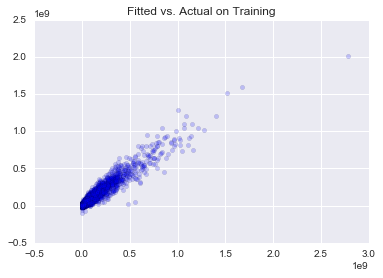

In [256]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.title('Fitted vs. Actual on Training')
plt.plot(np.linspace(0,3,40),np.linspace(0,3,40))
plt.show()


In [ ]:
lin_reg_est.mean_squared_error(predicted,test)

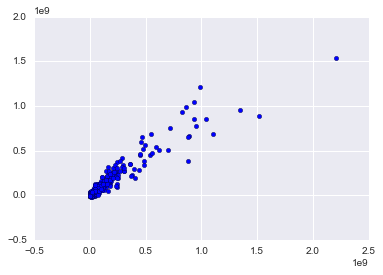

In [237]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.title('Fitted vs. Actual on Holdout')
plt.plot([0, 400], [0, 400])

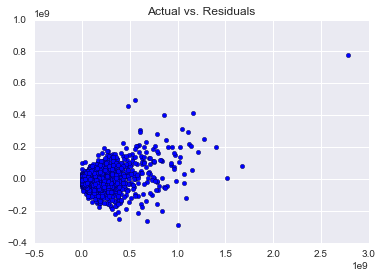

In [235]:
# Plot Residuals

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Actual vs. Residuals")

In [239]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression:", r2_score(y_holdout, y_pred))

Linear Regression: 0.885177847709


In [258]:
import sklearn
sklearn.metrics.mean_squared_error(y_holdout,y_pred)

6477840495547744.0